# KRW rates against USD and CAD


In [298]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [299]:
plt.style.use('seaborn')

In [300]:
df = yf.download('USDKRW=X, CADKRW=X', parse_dates=["Date"], index_col="Date")
df = df.Close
df

[*********************100%***********************]  2 of 2 completed


,CADKRW=X,USDKRW=X
Date,,
2003-12-01,918.719971,1198.400024
2003-12-02,921.409973,1195.000000
2003-12-03,917.010010,1192.500000
2003-12-04,907.510010,1190.099976
2003-12-05,908.460022,1184.699951
...,...,...
2022-06-30,1010.310852,1301.729980
2022-07-01,1000.182556,1287.709961
2022-07-04,1007.013977,1297.890015


In [301]:
plt.rc('figure', figsize=(17, 8))
plt.rc('font', size=16)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=16)


<AxesSubplot:xlabel='Date'>

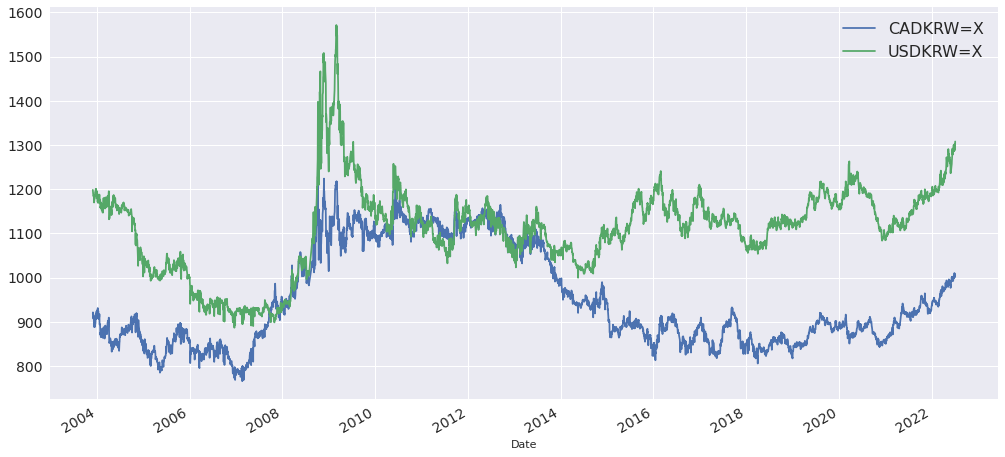

In [302]:
df.plot()

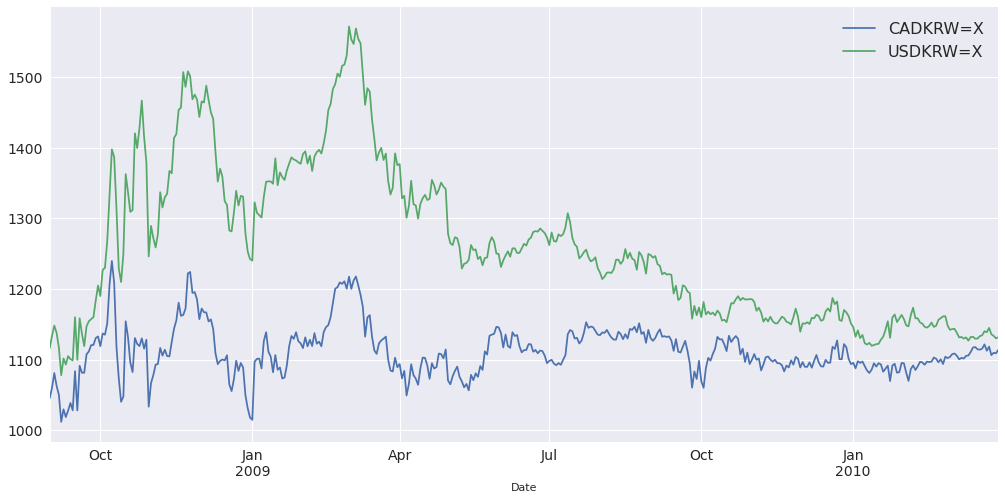

In [303]:
import matplotlib.dates as mdates 

ax = df.loc['2008-09':'2010-03'].plot()
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
plt.show()


In [304]:
df.head()

,CADKRW=X,USDKRW=X
Date,,
2003-12-01,918.719971,1198.400024
2003-12-02,921.409973,1195.000000
2003-12-03,917.010010,1192.500000
2003-12-04,907.510010,1190.099976
2003-12-05,908.460022,1184.699951


## USD | CAD - KRW. 2004 - 
On global crisis, USD spikes at the faster rate than CAD.

<AxesSubplot:xlabel='Date'>

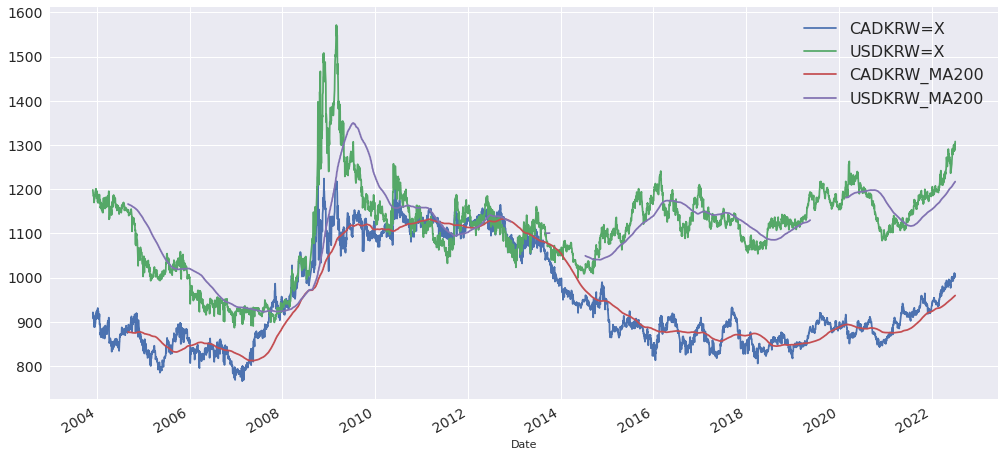

In [305]:
df["CADKRW_MA200"] = df["CADKRW=X"].rolling(200).mean()
df["USDKRW_MA200"] = df["USDKRW=X"].rolling(200).mean()
df.plot()

## Fed Rate - USDKRW


In [306]:
fed_rate = pd.read_csv('./fed_rates_1954_2022.csv', parse_dates=['observation_date'], index_col='observation_date')
fed_rate

,FEDFUNDS
observation_date,
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83
...,...
2022-01-01,0.08
2022-02-01,0.08
2022-03-01,0.20


In [307]:
df["rates"] = fed_rate
df

,CADKRW=X,USDKRW=X,CADKRW_MA200,USDKRW_MA200,rates
Date,,,,,
2003-12-01,918.719971,1198.400024,NaN,NaN,0.98
2003-12-02,921.409973,1195.000000,NaN,NaN,NaN
2003-12-03,917.010010,1192.500000,NaN,NaN,NaN
2003-12-04,907.510010,1190.099976,NaN,NaN,NaN
2003-12-05,908.460022,1184.699951,NaN,NaN,NaN
...,...,...,...,...,...
2022-06-30,1010.310852,1301.729980,958.118314,1214.884452,NaN
2022-07-01,1000.182556,1287.709961,958.480526,1215.449502,NaN
2022-07-04,1007.013977,1297.890015,958.855278,1216.042952,NaN


## Rate, oil on USD, CAD, and KRW
- Are fed rate and oil price leading or lagging indicator?
- How are they interact with three currencies?

In [308]:
rate = pd.read_csv('./fed_rates_1954_2022.csv', parse_dates=['observation_date'], index_col='observation_date')
rate.rename({ "FEDFUNDS": "fed_rate"}, axis=1, inplace=True)
rate

,fed_rate
observation_date,
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83
...,...
2022-01-01,0.08
2022-02-01,0.08
2022-03-01,0.20


In [309]:
oil = pd.read_csv('./crude_oil_prices_brent_europe_1987_2022.csv', parse_dates=['DATE'], index_col='DATE')
oil.rename({"DCOILBRENTEU": "oil_price"}, axis=1, inplace=True)
oil

,oil_price
DATE,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2022-06-07,126.89
2022-06-08,129.2
2022-06-09,128.47


In [310]:
usdkrw = pd.read_csv('./usdkor_daily_1981_2022.csv', parse_dates=['DATE'], index_col='DATE')
usdkrw.rename({"DEXKOUS": "usd_krw"}, axis=1, inplace=True)
usdkrw

,usd_krw
DATE,
1981-04-13,675.40
1981-04-14,676.70
1981-04-15,676.70
1981-04-16,676.70
1981-04-17,676.75
...,...
2022-06-20,.
2022-06-21,1293.25
2022-06-22,1297.21


In [311]:
usdcad = pd.read_csv('./cadusd_daily_1971_2022.csv', parse_dates=["DATE"], index_col='DATE')
usdcad.rename({"DEXCAUS": "usd_cad"}, axis=1, inplace=True)
usdcad

,usd_cad
DATE,
1971-01-04,1.0109
1971-01-05,1.0102
1971-01-06,1.0106
1971-01-07,1.0148
1971-01-08,1.0154
...,...
2022-06-20,.
2022-06-21,1.2927
2022-06-22,1.2932


In [312]:
df = pd.DataFrame()
df.index = pd.date_range(start='1954-07-01', end='2022-06-24')
df.index.name = 'date'
df

""
date
1954-07-01
1954-07-02
1954-07-03
1954-07-04
1954-07-05
...
2022-06-20
2022-06-21
2022-06-22


In [313]:
df["fed_rate"] = fed_rate
df["oil_price"] = oil
df["usd_krw"] = usdkrw
df["usd_cad"] = usdcad
df

,fed_rate,oil_price,usd_krw,usd_cad
date,,,,
1954-07-01,0.8,NaN,NaN,NaN
1954-07-02,NaN,NaN,NaN,NaN
1954-07-03,NaN,NaN,NaN,NaN
1954-07-04,NaN,NaN,NaN,NaN
1954-07-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2022-06-20,NaN,NaN,.,.
2022-06-21,NaN,NaN,1293.25,1.2927
2022-06-22,NaN,NaN,1297.21,1.2932


In [314]:
df.fed_rate.ffill(inplace=True)

In [315]:
def isnumber(x):
    try:
        float(x)
        return True
    except:
        return False

# if you filter a dataframe with boolean df, the cells with False will be replaced with NaN
df = df[df.applymap(isnumber)]

In [316]:
# convert string into number
df = df.applymap(float)

<AxesSubplot:xlabel='date'>

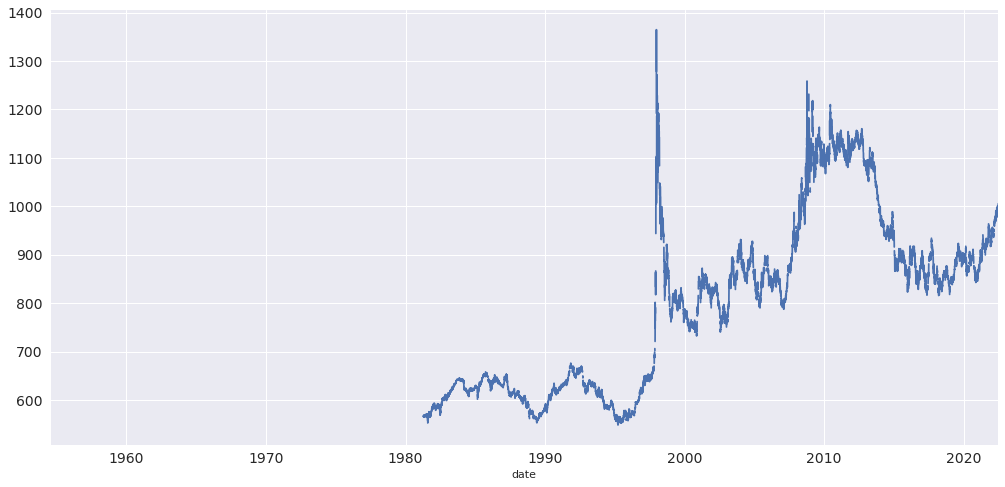

In [317]:
df["cad_krw"] = df.usd_krw / df.usd_cad
df["cad_krw"].plot()

<AxesSubplot:xlabel='date'>

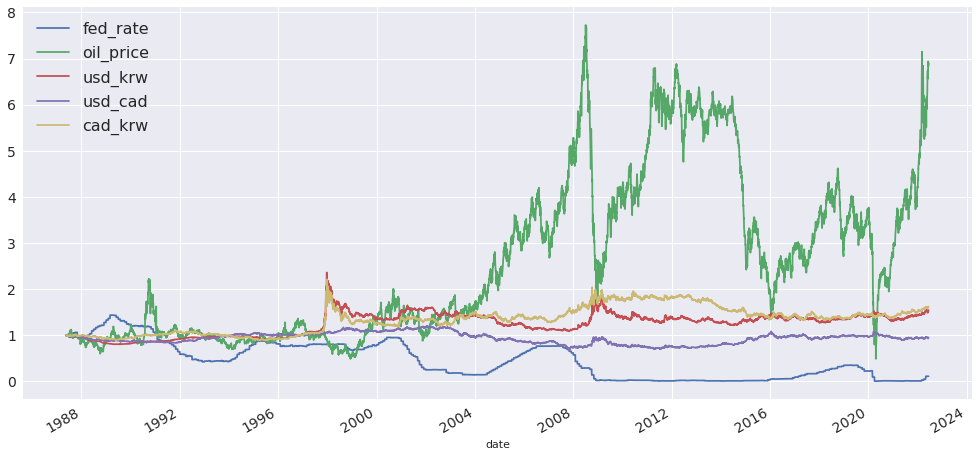

In [318]:
# normalize with the starting value
normalized = df.dropna()
normalized = normalized / normalized.iloc[0]
normalized.plot()

<AxesSubplot:xlabel='date'>

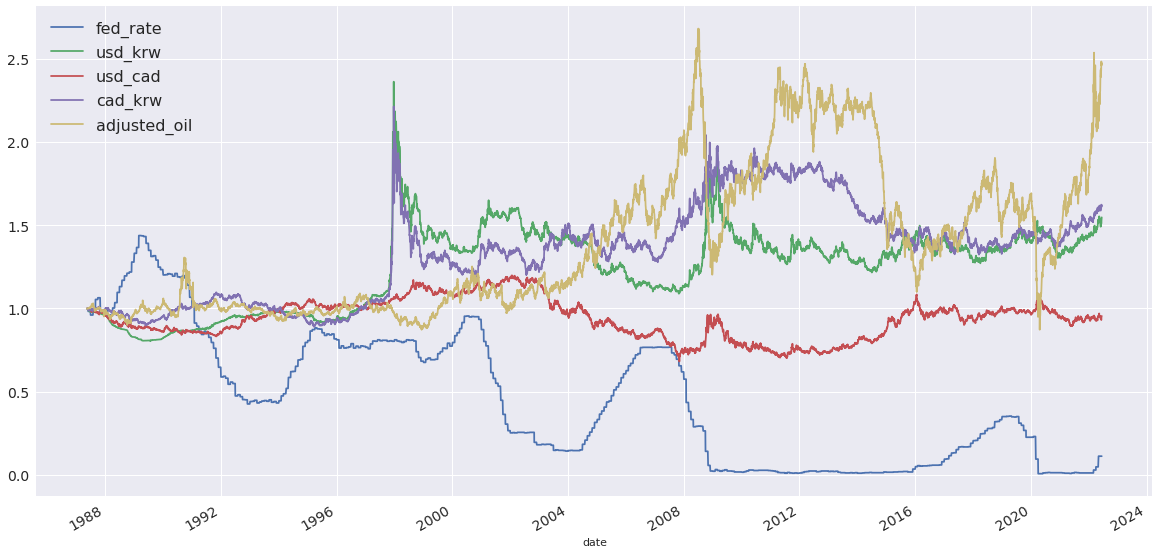

In [319]:
# scale down oil to see them better
normalized["adjusted_oil"] = normalized.oil_price / 4 + 0.75
normalized.drop('oil_price', axis=1).plot(figsize=(20, 10))

CAD-KRW has a strong correlation with oil price and inverse correlation with fed rates.
For USD-KRW, the fed rate has a strong, but little bit weaker correlation compared to CAD-KRW, and a weak correlation with the oil price.

In [320]:
normalized.corr()

,fed_rate,oil_price,usd_krw,usd_cad,cad_krw,adjusted_oil
fed_rate,1.000000,-0.631500,-0.622711,0.231451,-0.751132,-0.631500
oil_price,-0.631500,1.000000,0.306897,-0.702188,0.772056,1.000000
usd_krw,-0.622711,0.306897,1.000000,0.256898,0.759203,0.306897
usd_cad,0.231451,-0.702188,0.256898,1.000000,-0.425928,-0.702188
cad_krw,-0.751132,0.772056,0.759203,-0.425928,1.000000,0.772056
adjusted_oil,-0.631500,1.000000,0.306897,-0.702188,0.772056,1.000000


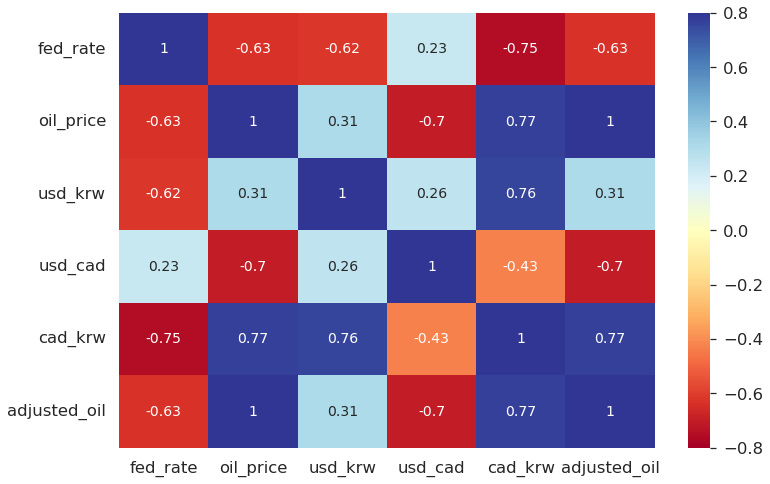

In [321]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5)
sns.heatmap(
    normalized.corr(),cmap="RdYlBu", annot=True,
    annot_kws={"size":14}, vmax=0.8, vmin=-0.8
    )
plt.show()

- The biggest spike around 1998 is coming from IMF crisis in SK, and seems to be detached from the rate.
- Global financial crisis in 2008 seems to be causing a big surge.
- Fed rate seems to affect more closely after 2008.

<AxesSubplot:xlabel='date'>

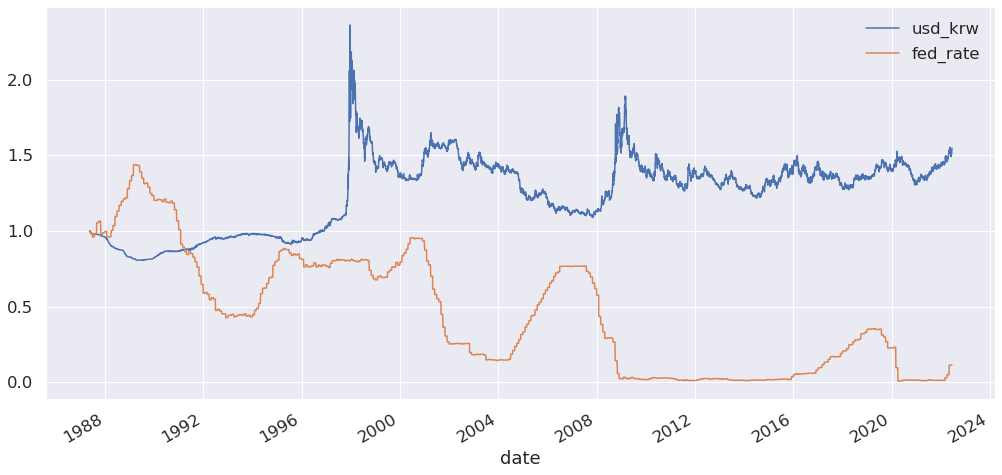

In [322]:
normalized[["usd_krw", "fed_rate"]].plot()

Fed rate is almost acting as a leading indicator to USD-KRW after around 2017, but why did it not before? 
All the fluctuation before 2018 doesn't seem to care about the rate.

<AxesSubplot:xlabel='date'>

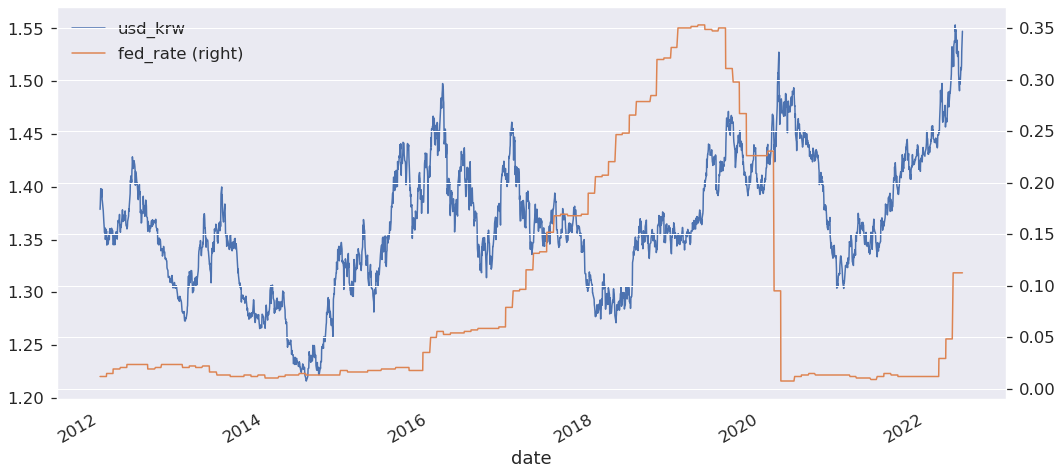

In [323]:
normalized[["usd_krw", "fed_rate"]].loc["2012":].plot(
    secondary_y="fed_rate"
)

<AxesSubplot:xlabel='date'>

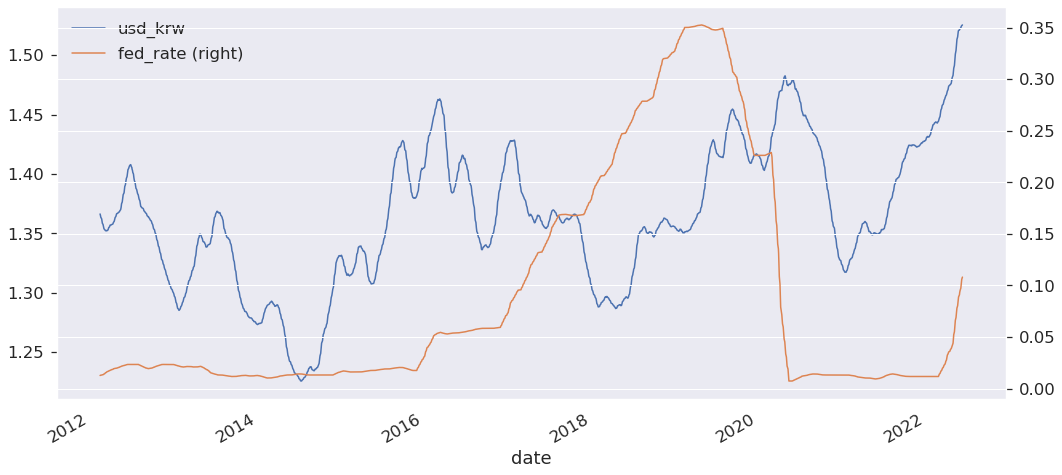

In [324]:
normalized[["usd_krw", "fed_rate"]].loc["2012":].rolling(30).mean().plot(
    secondary_y="fed_rate"
)

<AxesSubplot:xlabel='date'>

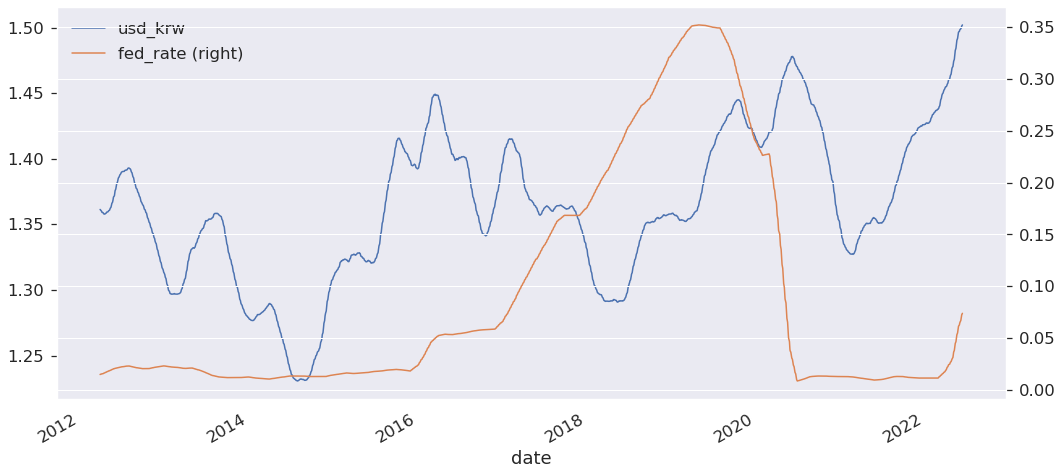

In [325]:
normalized[["usd_krw", "fed_rate"]].loc["2012":].rolling(60).mean().plot(
    secondary_y="fed_rate"
)

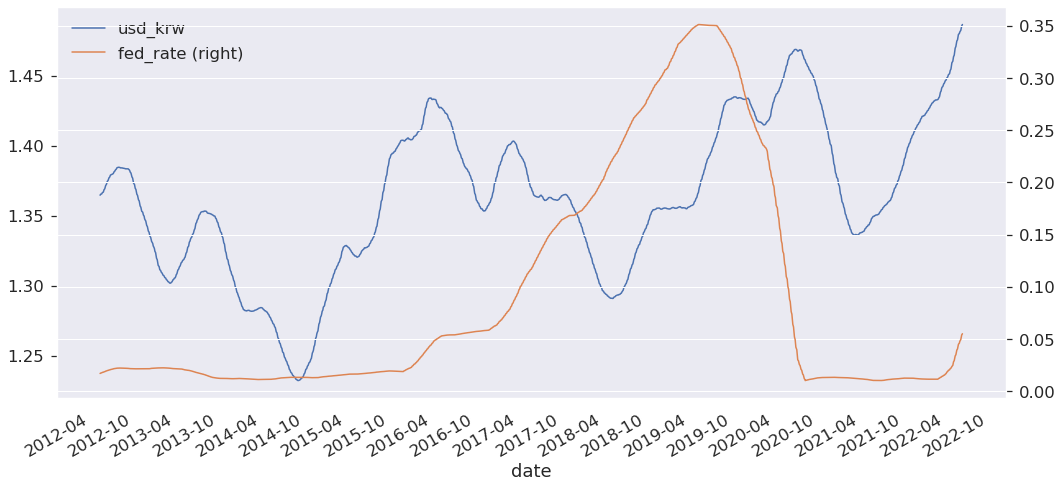

In [326]:
import matplotlib.dates as mdates

ax = normalized[["usd_krw", "fed_rate"]].loc["2012":].rolling(90).mean().plot(
    secondary_y="fed_rate",
    x_compat=True
)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))

plt.show()


[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='date'>

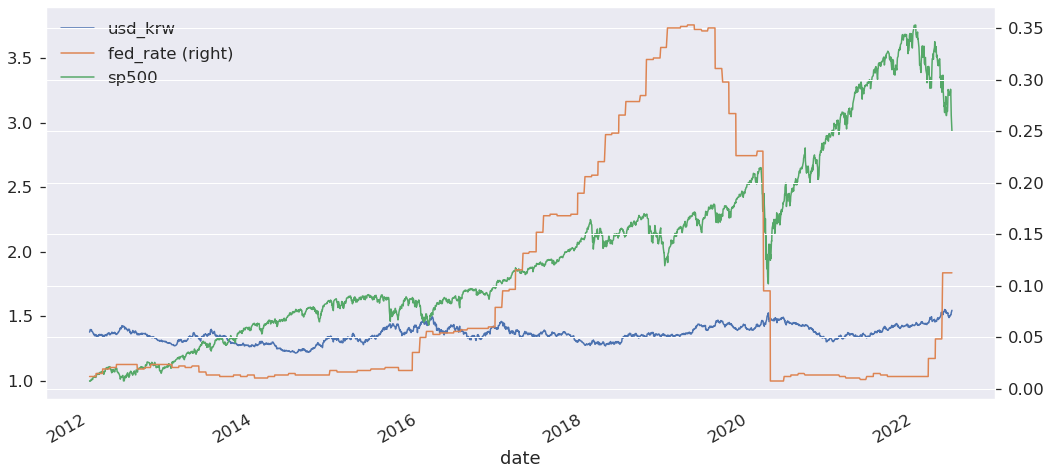

In [327]:
import yfinance as yf

sp500 = yf.download('^GSPC', start="2012-01-01")["Close"].to_frame("sp500")
sp500 /= sp500.iloc[0]
sp500
normalized["sp500"] = sp500

normalized[["usd_krw", "fed_rate", "sp500"]].loc["2012":].plot(
    secondary_y="fed_rate"
)

Fed rate was already on downhill before the beginning of the pandemic. Why?

[2019: The year the Federal Reserve admitted it was wrong
]('./year-federal-reserve-admitted-it-was-wrong.md')

> “The data is just screaming at them: We can sustain this low unemployment rate for a considerable amount of time without creating inflationary pressures,”

> The Fed spent most of last year concerned that Trump’s tax cuts would spur a hot economy and rising inflation. Fed leaders anticipated they would need to raise interest rates twice in 2019 to tap the brakes on the economy. None of that came to pass.

> By Jan. 4, Powell had a different message, effectively admitting the December 2018 rate hike was a miscalculation.

> In July, the Fed made its first rate cut in more than a decade, as it became more likely that the economy needed stimulus, not restraint.

> “Part of the reason the Fed had to cut this year was because the trade wars were taking a bigger bite out of growth,”

> Fears of a recession have faded, largely because of the Fed’s three interest rate cuts in the latter half of the year which helped to counterbalance the harm from Trump’s trade war. Even the bond market, which briefly flashed a warning sign in August when the [yield curve inverted](https://www.washingtonpost.com/business/2019/08/14/recession-watch-what-is-an-inverted-yield-curve-why-does-it-matter/?itid=lk_inline_manual_43), is now back to its normal.

- Unemployment rate & inflation is what the fed is looking at 
- Fed tries to take pre-active action to keep the inflation and employment at the healthy level
- Bond market, as someone on the youtube mentioned, is supposed to be a leading indicator of market mood.

TODO: get unemployment, inflation, bond market data

# FRED API
FRED offers free access to their API.


In [328]:
# Use dotenv and os to load up api key from .env file
from dotenv import load_dotenv
import os

load_dotenv()

fred_api = os.getenv('fred_key')
fred_api[-4:]

'ef7d'

In [329]:
from fredapi import Fred

fred = Fred(api_key=fred_api)
fred.get_series('SP500')

2012-07-06    1354.68
2012-07-09    1352.46
2012-07-10    1341.47
2012-07-11    1341.45
2012-07-12    1334.76
               ...   
2022-06-29    3818.83
2022-06-30    3785.38
2022-07-01    3825.33
2022-07-04        NaN
2022-07-05    3831.39
Length: 2608, dtype: float64

In [330]:
fred.get_series('UNRATE')

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2022-01-01    4.0
2022-02-01    3.8
2022-03-01    3.6
2022-04-01    3.6
2022-05-01    3.6
Length: 893, dtype: float64

In [331]:
#  Consumer Price Index for All Urban Consumers: All Items in U.S. City Average
cpi = fred.get_series('CPIAUCSL')

<AxesSubplot:>

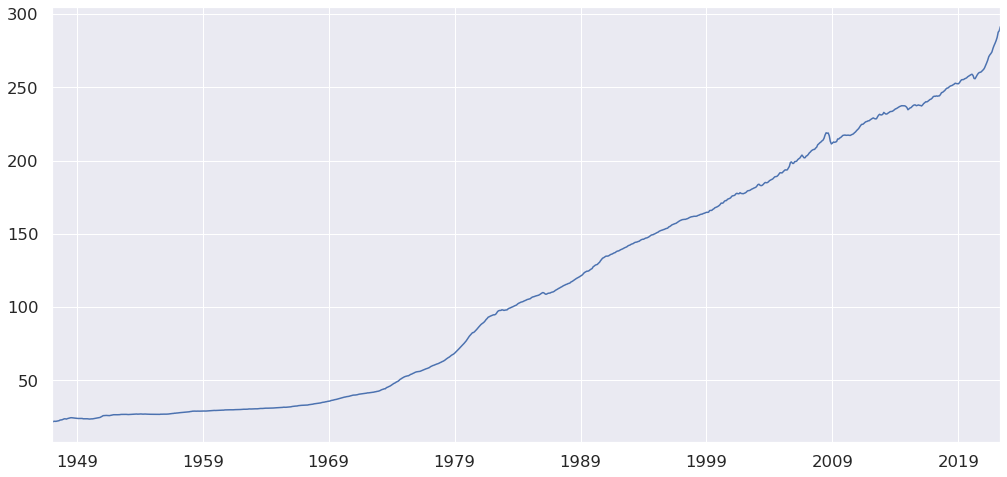

In [332]:
cpi.plot()

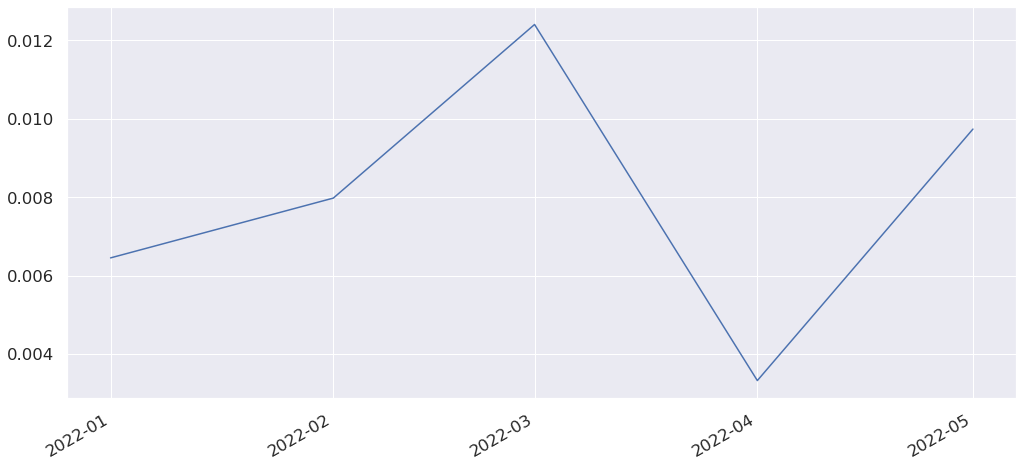

In [340]:
ax = cpi.pct_change()["2022":].plot(x_compat = True)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.show()